# Time Series Analysis at Grid Point (256, 256)

This notebook analyzes the time evolution of density, potential, and vorticity at a specific grid point (x=256, y=256).

## Grid Point
- x = 256
- y = 256
- Frames: 0-5000 (5001 total frames)


In [5]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys

# Try to import h5py, install if needed
try:
    import h5py
    print(f"h5py version: {h5py.__version__}")
except ImportError:
    print("h5py not found. Installing...")
    import subprocess
    subprocess.check_call([sys.executable, "-m", "pip", "install", "h5py", "--user"])
    import h5py
    print("h5py installed successfully")

# Set up plotting
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

# Set data directory
data_dir = "/global/homes/d/dn2648/work/turbulence_data/alpha01kappa10"
print(f"Data directory: {data_dir}")


h5py version: 3.10.0
Data directory: /global/homes/d/dn2648/work/turbulence_data/alpha01kappa10


In [6]:
def load_h5_data(filename, dataset_name=None):
    """Load data from an HDF5 file."""
    filepath = os.path.join(data_dir, filename)
    if not os.path.exists(filepath):
        print(f"File {filename} does not exist")
        return None
    
    try:
        with h5py.File(filepath, 'r') as f:
            if dataset_name is None:
                # Try to find the first dataset
                keys = list(f.keys())
                if keys:
                    dataset_name = keys[0]
                else:
                    print(f"No datasets found in {filename}")
                    return None
            
            data = f[dataset_name][:]
            print(f"Loaded {dataset_name} from {filename}")
            print(f"  Shape: {data.shape}")
            return data
    except Exception as e:
        print(f"Error loading {filename}: {e}")
        return None

# Load data from each file
den_data = load_h5_data('den.h5')
phi_data = load_h5_data('phi.h5')
w_data = load_h5_data('w.h5')


Loaded den from den.h5
  Shape: (5001, 512, 512)
Loaded phi from phi.h5
  Shape: (5001, 512, 512)
Loaded w from w.h5
  Shape: (5001, 512, 512)


In [7]:
# Extract time series at grid point (x=256, y=256)
x_coord = 256
y_coord = 256

# Verify grid coordinates are valid
if den_data is not None:
    nframes, nx, ny = den_data.shape
    print(f"Data shape: ({nframes}, {nx}, {ny})")
    print(f"Extracting time series at grid point (x={x_coord}, y={y_coord})")
    
    if x_coord >= nx or y_coord >= ny:
        print(f"Error: Grid coordinates ({x_coord}, {y_coord}) out of range!")
        print(f"Valid range: x in [0, {nx-1}], y in [0, {ny-1}]")
    else:
        # Extract time series (frames 0-5000)
        den_timeseries = den_data[0:5001, y_coord, x_coord]  # Note: numpy indexing is [time, y, x]
        phi_timeseries = phi_data[0:5001, y_coord, x_coord]
        w_timeseries = w_data[0:5001, y_coord, x_coord]
        
        print(f"Extracted time series with {len(den_timeseries)} frames")
        print(f"Density range: [{np.min(den_timeseries):.6e}, {np.max(den_timeseries):.6e}]")
        print(f"Potential range: [{np.min(phi_timeseries):.6e}, {np.max(phi_timeseries):.6e}]")
        print(f"Vorticity range: [{np.min(w_timeseries):.6e}, {np.max(w_timeseries):.6e}]")
else:
    print("Error: Could not load data")


Data shape: (5001, 512, 512)
Extracting time series at grid point (x=256, y=256)
Extracted time series with 5001 frames
Density range: [-1.849961e+01, 1.799925e+01]
Potential range: [-2.516876e+01, 1.637213e+01]
Vorticity range: [-2.305026e+01, 4.335625e+01]


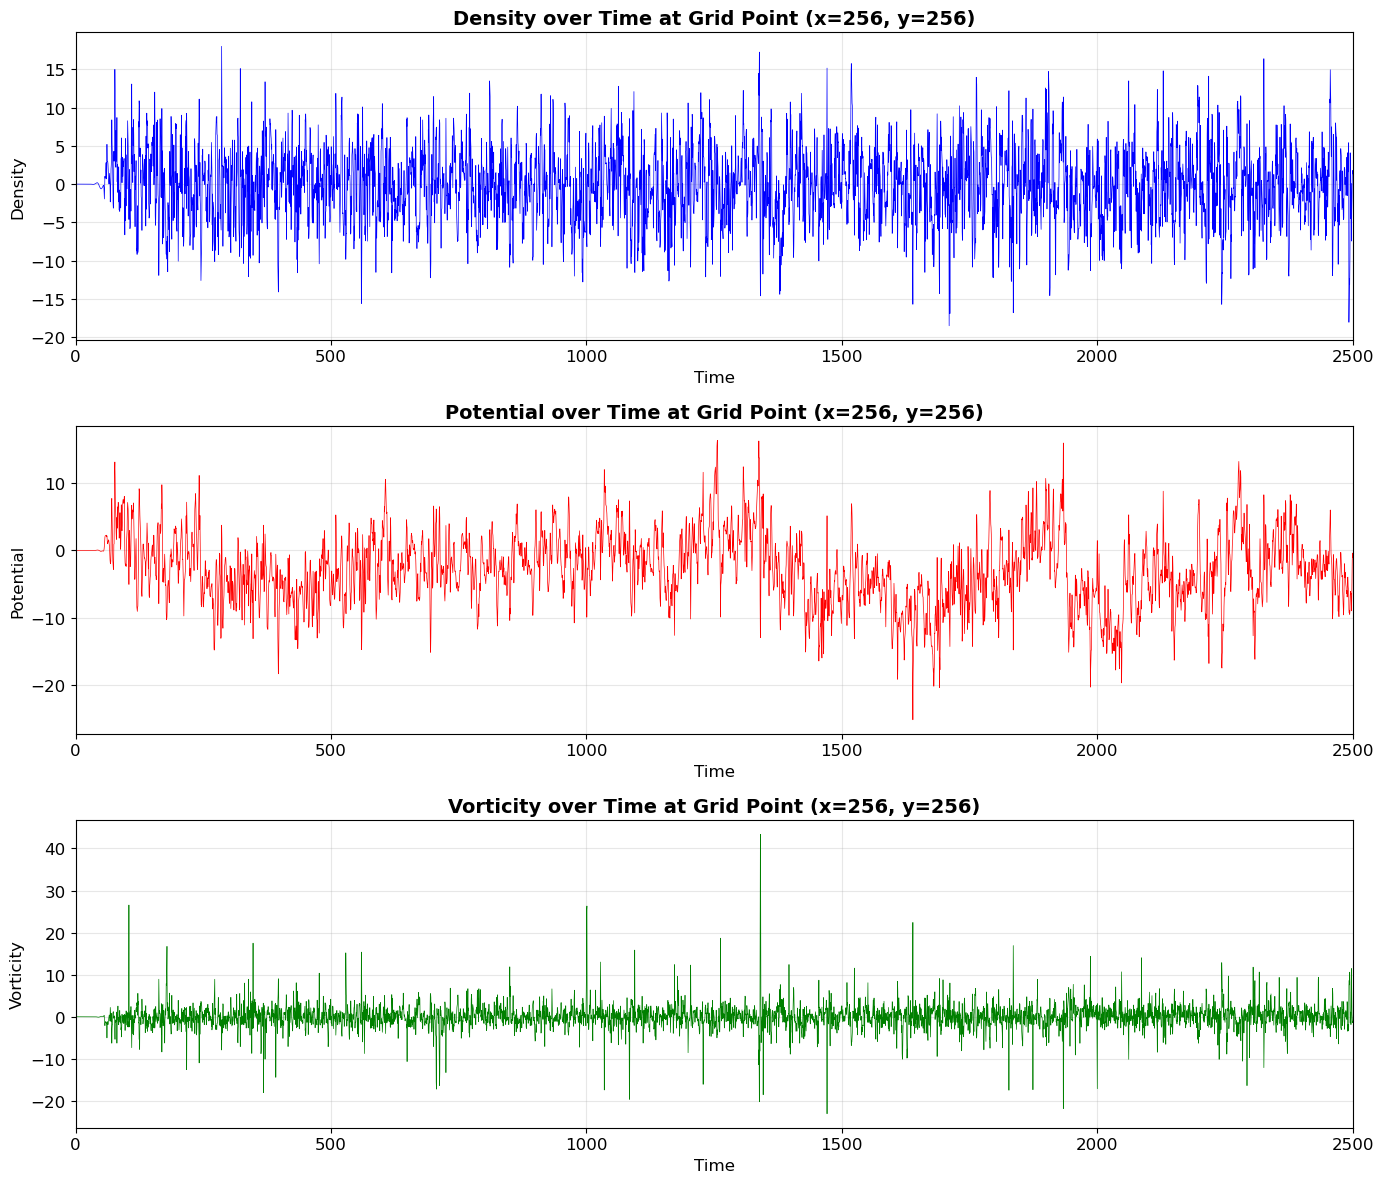

In [8]:
# Calculate time array
dt = 0.005
nfdump = 100
time = np.arange(5001) * dt * nfdump  # Time for frames 0-5000

# Create three separate plots
fig, axes = plt.subplots(3, 1, figsize=(14, 12))

# Plot 1: Density over time
axes[0].plot(time, den_timeseries, 'b-', linewidth=0.5)
axes[0].set_xlabel('Time', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)
axes[0].set_title(f'Density over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlim(time[0], time[-1])

# Plot 2: Potential over time
axes[1].plot(time, phi_timeseries, 'r-', linewidth=0.5)
axes[1].set_xlabel('Time', fontsize=12)
axes[1].set_ylabel('Potential', fontsize=12)
axes[1].set_title(f'Potential over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlim(time[0], time[-1])

# Plot 3: Vorticity over time
axes[2].plot(time, w_timeseries, 'g-', linewidth=0.5)
axes[2].set_xlabel('Time', fontsize=12)
axes[2].set_ylabel('Vorticity', fontsize=12)
axes[2].set_title(f'Vorticity over Time at Grid Point (x={x_coord}, y={y_coord})', fontsize=14, fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlim(time[0], time[-1])

plt.tight_layout()
plt.show()


In [7]:
# Save time series to CSV file
output_dir = "/global/homes/d/dn2648/notebooks/mhw_turbulence"
os.makedirs(output_dir, exist_ok=True)

csv_filename = os.path.join(output_dir, "x256y256_timeseries.csv")

# Create DataFrame with time and the three time series
df = pd.DataFrame({
    'frame': np.arange(5001),
    'time': time,
    'density': den_timeseries,
    'potential': phi_timeseries,
    'vorticity': w_timeseries
})

# Save to CSV
df.to_csv(csv_filename, index=False)
print(f"Time series saved to: {csv_filename}")
print(f"CSV file contains {len(df)} rows")
print(f"\nFirst few rows:")
print(df.head())
print(f"\nLast few rows:")
print(df.tail())


Time series saved to: /global/homes/d/dn2648/notebooks/mhw_turbulence/x256y256_timeseries.csv
CSV file contains 5001 rows

First few rows:
   frame  time   density  potential  vorticity
0      0   0.0 -0.000088  -0.000088   0.022597
1      1   0.5 -0.000049  -0.000012   0.000243
2      2   1.0 -0.000051  -0.000011   0.000202
3      3   1.5 -0.000050  -0.000009   0.000161
4      4   2.0 -0.000049  -0.000008   0.000130

Last few rows:
      frame    time   density  potential  vorticity
4996   4996  2498.0 -3.412650  -7.410541   4.638269
4997   4997  2498.5 -1.721010  -4.237697   0.628150
4998   4998  2499.0  1.133027  -1.447997  -0.569710
4999   4999  2499.5  1.779145  -0.384697  -1.408207
5000   5000  2500.0  1.352949  -1.016305  -1.064726


## Chronos Forecasting

We now setup and use Chronos for forecasting of Density, Potential, and Vorticity

In [1]:
import subprocess
import sys
import os

# Check if packages are installed
try:
    import torch
    import chronos
    print("✓ All packages already installed!")
except ImportError:
    print("Installing packages...")
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "torch", "torchvision", "torchaudio",
        "--index-url", "https://download.pytorch.org/whl/cpu",
        "--break-system-packages"
    ])
    subprocess.check_call([
        sys.executable, "-m", "pip", "install", 
        "chronos-forecasting",
        "--break-system-packages"
    ])
    print("\nPackages installed. Restarting kernel...")
    #os._exit(00)  # Force kernel restart

✓ All packages already installed!


In [2]:
import torch
from chronos import ChronosPipeline

In [ ]:
# Step 2: Load Chronos Model
print("Loading Chronos model...")
pipeline = ChronosPipeline.from_pretrained(
    "amazon/chronos-t5-small",  # Options: tiny, mini, small, base, large
    device_map="auto",  # Automatically use GPU if available
    torch_dtype=torch.bfloat16,
)
print("Model loaded successfully!")
print(f"Device: {pipeline.model.device}")

Loading Chronos model...
Model loaded successfully!
Device: cuda:0


In [ ]:
# Step 3: Prepare Data for Forecasting
# First 4500 timesteps for context and next 500 for forecast

context_length = 4500  # Use first 4500 points as context
forecast_horizon = 500  # Predict next 500 timesteps

# Prepare the three time series for forecasting
den_context = torch.tensor(den_timeseries[:context_length], dtype=torch.float32).unsqueeze(0)
phi_context = torch.tensor(phi_timeseries[:context_length], dtype=torch.float32).unsqueeze(0)
w_context = torch.tensor(w_timeseries[:context_length], dtype=torch.float32).unsqueeze(0)

print(f"Context length: {context_length}")
print(f"Forecast horizon: {forecast_horizon}")
print(f"Density context shape: {den_context.shape}")
print(f"Potential context shape: {phi_context.shape}")
print(f"Vorticity context shape: {w_context.shape}")

Context length: 4500
Forecast horizon: 500
Density context shape: torch.Size([1, 4500])
Potential context shape: torch.Size([1, 4500])
Vorticity context shape: torch.Size([1, 4500])


In [13]:
# Step 4: Generate Forecasts
print("Generating forecasts...")

# Forecast for Density
den_forecast = pipeline.predict(
    den_context,  # Pass context directly as first argument, not as keyword
    prediction_length=forecast_horizon,
    num_samples=20,
)

# Forecast for Potential
phi_forecast = pipeline.predict(
    phi_context,
    prediction_length=forecast_horizon,
    num_samples=20,
)

# Forecast for Vorticity
w_forecast = pipeline.predict(
    w_context,
    prediction_length=forecast_horizon,
    num_samples=20,
)

print("Forecasts generated!")
print(f"Density forecast shape: {den_forecast.shape}")
print(f"Potential forecast shape: {phi_forecast.shape}")
print(f"Vorticity forecast shape: {w_forecast.shape}")

We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 


Generating forecasts...


We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 
We recommend keeping prediction length <= 64. The quality of longer predictions may degrade since the model is not optimized for it. 


Forecasts generated!
Density forecast shape: torch.Size([1, 20, 500])
Potential forecast shape: torch.Size([1, 20, 500])
Vorticity forecast shape: torch.Size([1, 20, 500])


In [23]:
# Diagnostic cell for dimensions
print("Shape diagnostics:")
print(f"time_forecast: {time_forecast.shape}")
print(f"den_mean: {den_mean.shape}")
print(f"den_lower: {den_lower.shape}")
print(f"den_upper: {den_upper.shape}")
print(f"ground_truth_den: {ground_truth_den.shape}")
print(f"\nAll should be (500,)")

Shape diagnostics:
time_forecast: (500,)
den_mean: (500,)
den_lower: (500,)
den_upper: (500,)
ground_truth_den: (500,)

All should be (500,)


In [22]:
#Step 5: Calculate Mean and CI intervals

# Convert forecasts to numpy
den_forecast_np = den_forecast.cpu().numpy() if den_forecast.is_cuda else den_forecast.numpy()
phi_forecast_np = phi_forecast.cpu().numpy() if phi_forecast.is_cuda else phi_forecast.numpy()
w_forecast_np = w_forecast.cpu().numpy() if w_forecast.is_cuda else w_forecast.numpy()

print(f"Original forecast shapes: {den_forecast_np.shape}")

# Remove batch dimension (dimension 0)
den_forecast_np = den_forecast_np.squeeze(0)  # (1, 20, 500) -> (20, 500)
phi_forecast_np = phi_forecast_np.squeeze(0)
w_forecast_np = w_forecast_np.squeeze(0)

print(f"After removing batch dimension: {den_forecast_np.shape}")
print(f"Expected: (20, 500) - 20 samples, 500 timesteps")

# Now aggregate over samples (axis 0)
den_mean = np.mean(den_forecast_np, axis=0)
den_lower = np.percentile(den_forecast_np, 10, axis=0)
den_upper = np.percentile(den_forecast_np, 90, axis=0)

phi_mean = np.mean(phi_forecast_np, axis=0)
phi_lower = np.percentile(phi_forecast_np, 10, axis=0)
phi_upper = np.percentile(phi_forecast_np, 90, axis=0)

w_mean = np.mean(w_forecast_np, axis=0)
w_lower = np.percentile(w_forecast_np, 10, axis=0)
w_upper = np.percentile(w_forecast_np, 90, axis=0)

print("\n✓ Statistics calculated!")
print(f"den_mean shape: {den_mean.shape} (should be (500,))")
print(f"den_lower shape: {den_lower.shape} (should be (500,))")
print(f"den_upper shape: {den_upper.shape} (should be (500,))")
print(f"phi_mean shape: {phi_mean.shape} (should be (500,))")
print(f"w_mean shape: {w_mean.shape} (should be (500,))")

Original forecast shapes: (1, 20, 500)
After removing batch dimension: (20, 500)
Expected: (20, 500) - 20 samples, 500 timesteps

✓ Statistics calculated!
den_mean shape: (500,) (should be (500,))
den_lower shape: (500,) (should be (500,))
den_upper shape: (500,) (should be (500,))
phi_mean shape: (500,) (should be (500,))
w_mean shape: (500,) (should be (500,))


Prediction interval statistics:
Density interval width (mean): 0.4392
Potential interval width (mean): 2.4852
Vorticity interval width (mean): 0.1366


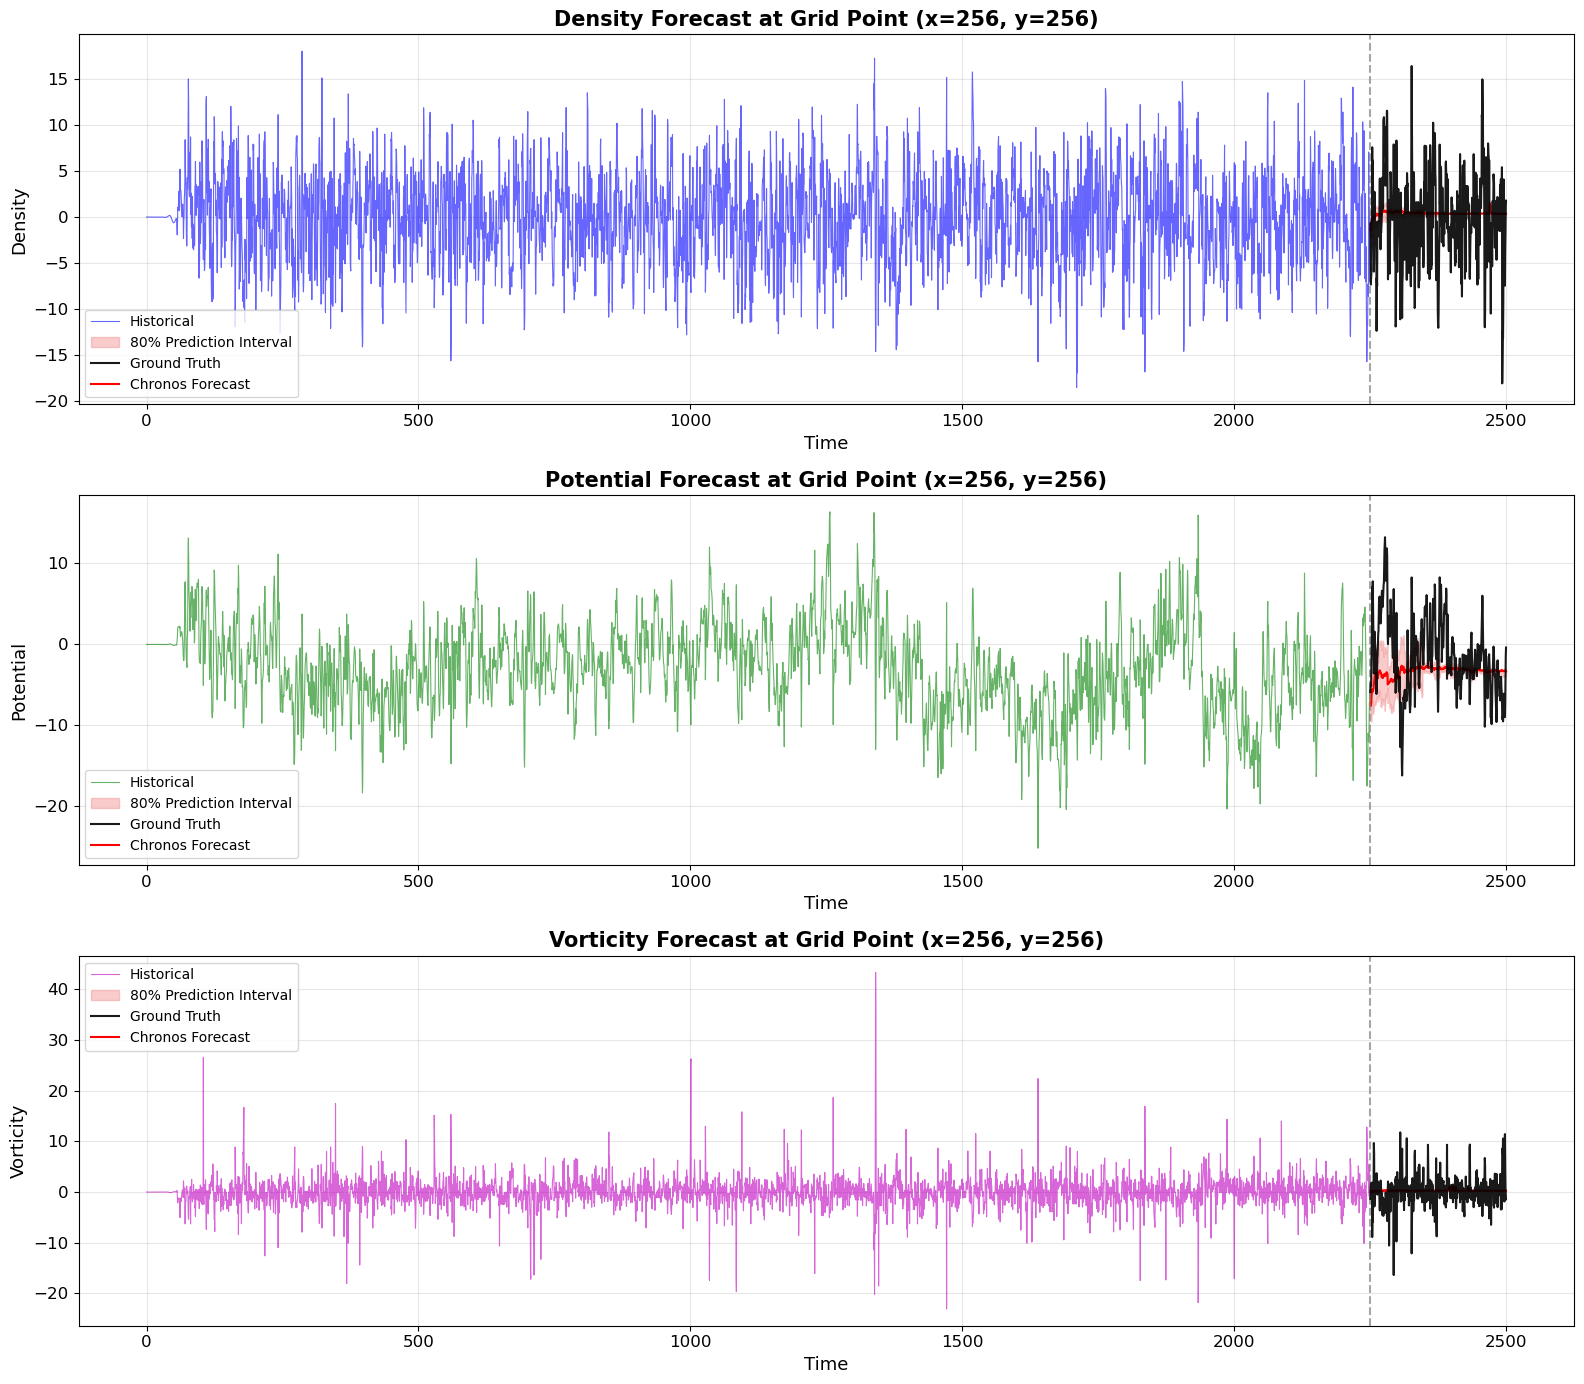

In [26]:
#Step 6: Visualize forecasts vs ground truth

# Create time arrays for plotting
time_context = time[:context_length]
time_forecast = time[context_length:context_length + forecast_horizon]
ground_truth_den = den_timeseries[context_length:context_length + forecast_horizon]
ground_truth_phi = phi_timeseries[context_length:context_length + forecast_horizon]
ground_truth_w = w_timeseries[context_length:context_length + forecast_horizon]

# Check interval widths
print("Prediction interval statistics:")
print(f"Density interval width (mean): {np.mean(den_upper - den_lower):.4f}")
print(f"Potential interval width (mean): {np.mean(phi_upper - phi_lower):.4f}")
print(f"Vorticity interval width (mean): {np.mean(w_upper - w_lower):.4f}")

fig, axes = plt.subplots(3, 1, figsize=(16, 14))

# Plot Density
axes[0].plot(time_context, den_timeseries[:context_length], 'b-', linewidth=0.8, label='Historical', alpha=0.6)
# Plot interval FIRST so it's behind the lines
axes[0].fill_between(time_forecast, den_lower, den_upper, alpha=0.4, color='lightcoral', label='80% Prediction Interval', zorder=1)
axes[0].plot(time_forecast, ground_truth_den, 'k-', linewidth=1.5, label='Ground Truth', alpha=0.9, zorder=3)
axes[0].plot(time_forecast, den_mean, 'r-', linewidth=1.5, label='Chronos Forecast', zorder=2)
axes[0].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
axes[0].set_xlabel('Time', fontsize=13)
axes[0].set_ylabel('Density', fontsize=13)
axes[0].set_title(f'Density Forecast at Grid Point (x={x_coord}, y={y_coord})', fontsize=15, fontweight='bold')
axes[0].legend(loc='best', fontsize=10)
axes[0].grid(True, alpha=0.3)

# Plot Potential
axes[1].plot(time_context, phi_timeseries[:context_length], 'g-', linewidth=0.8, label='Historical', alpha=0.6)
axes[1].fill_between(time_forecast, phi_lower, phi_upper, alpha=0.4, color='lightcoral', label='80% Prediction Interval', zorder=1)
axes[1].plot(time_forecast, ground_truth_phi, 'k-', linewidth=1.5, label='Ground Truth', alpha=0.9, zorder=3)
axes[1].plot(time_forecast, phi_mean, 'r-', linewidth=1.5, label='Chronos Forecast', zorder=2)
axes[1].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
axes[1].set_xlabel('Time', fontsize=13)
axes[1].set_ylabel('Potential', fontsize=13)
axes[1].set_title(f'Potential Forecast at Grid Point (x={x_coord}, y={y_coord})', fontsize=15, fontweight='bold')
axes[1].legend(loc='best', fontsize=10)
axes[1].grid(True, alpha=0.3)

# Plot Vorticity
axes[2].plot(time_context, w_timeseries[:context_length], 'm-', linewidth=0.8, label='Historical', alpha=0.6)
axes[2].fill_between(time_forecast, w_lower, w_upper, alpha=0.4, color='lightcoral', label='80% Prediction Interval', zorder=1)
axes[2].plot(time_forecast, ground_truth_w, 'k-', linewidth=1.5, label='Ground Truth', alpha=0.9, zorder=3)
axes[2].plot(time_forecast, w_mean, 'r-', linewidth=1.5, label='Chronos Forecast', zorder=2)
axes[2].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=1.5, alpha=0.7)
axes[2].set_xlabel('Time', fontsize=13)
axes[2].set_ylabel('Vorticity', fontsize=13)
axes[2].set_title(f'Vorticity Forecast at Grid Point (x={x_coord}, y={y_coord})', fontsize=15, fontweight='bold')
axes[2].legend(loc='best', fontsize=10)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [27]:
#Step 7: Calculate forecast accuracy metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Calculate MAE and RMSE for each variable
den_mae = mean_absolute_error(ground_truth_den, den_mean)
den_rmse = np.sqrt(mean_squared_error(ground_truth_den, den_mean))

phi_mae = mean_absolute_error(ground_truth_phi, phi_mean)
phi_rmse = np.sqrt(mean_squared_error(ground_truth_phi, phi_mean))

w_mae = mean_absolute_error(ground_truth_w, w_mean)
w_rmse = np.sqrt(mean_squared_error(ground_truth_w, w_mean))

# Calculate relative errors (as percentage of range)
den_range = ground_truth_den.max() - ground_truth_den.min()
phi_range = ground_truth_phi.max() - ground_truth_phi.min()
w_range = ground_truth_w.max() - ground_truth_w.min()

den_mae_pct = (den_mae / den_range) * 100 if den_range > 0 else 0
phi_mae_pct = (phi_mae / phi_range) * 100 if phi_range > 0 else 0
w_mae_pct = (w_mae / w_range) * 100 if w_range > 0 else 0

print("=" * 70)
print("FORECAST ACCURACY METRICS (500 timestep forecast)")
print("=" * 70)
print(f"\nDensity:")
print(f"  MAE:        {den_mae:.6f}")
print(f"  RMSE:       {den_rmse:.6f}")
print(f"  MAE (% of range): {den_mae_pct:.2f}%")
print(f"\nPotential:")
print(f"  MAE:        {phi_mae:.6f}")
print(f"  RMSE:       {phi_rmse:.6f}")
print(f"  MAE (% of range): {phi_mae_pct:.2f}%")
print(f"\nVorticity:")
print(f"  MAE:        {w_mae:.6f}")
print(f"  RMSE:       {w_rmse:.6f}")
print(f"  MAE (% of range): {w_mae_pct:.2f}%")
print("=" * 70)

FORECAST ACCURACY METRICS (500 timestep forecast)

Density:
  MAE:        3.634047
  RMSE:       4.798960
  MAE (% of range): 10.56%

Potential:
  MAE:        3.851723
  RMSE:       5.107423
  MAE (% of range): 13.09%

Vorticity:
  MAE:        1.923095
  RMSE:       2.899397
  MAE (% of range): 6.83%


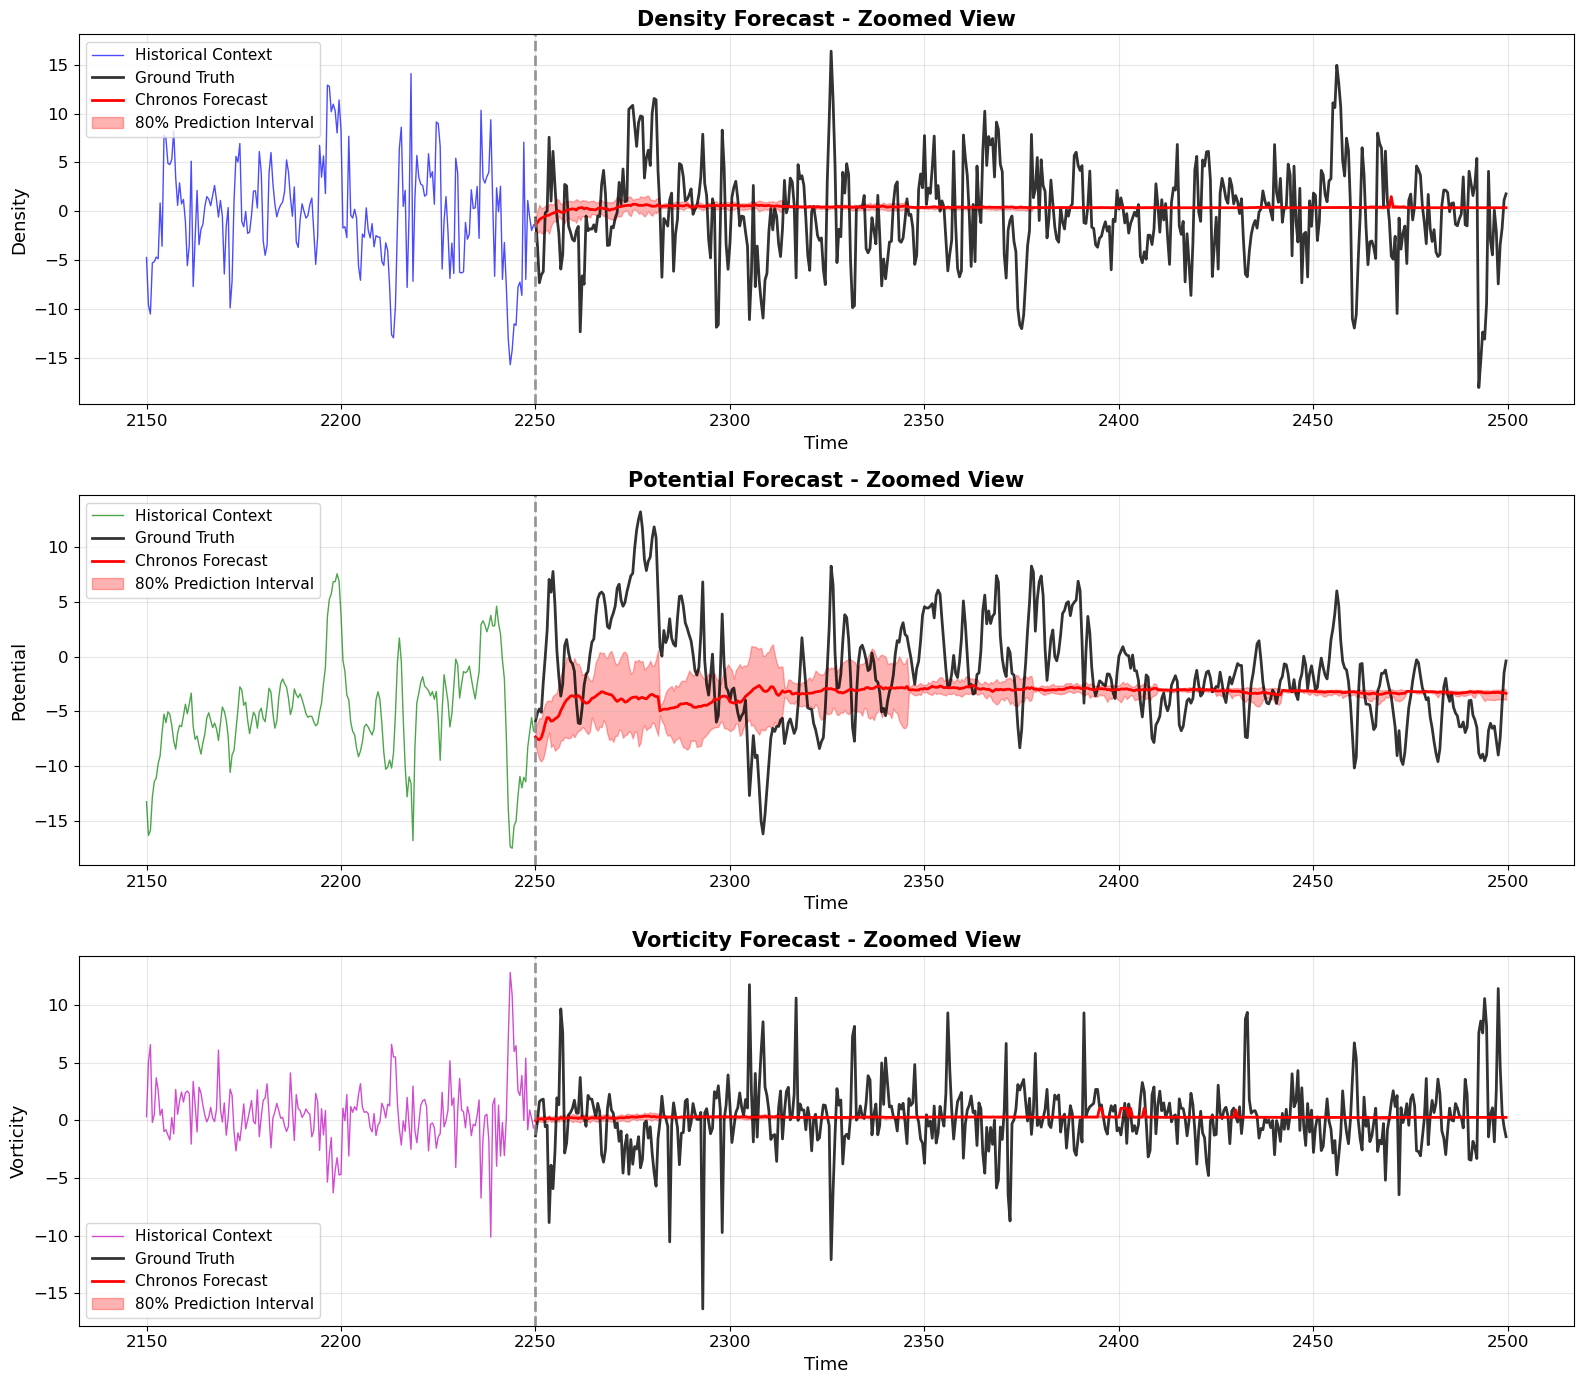

In [28]:
# Step 8: Zoom in on forecast region

# Create a zoomed-in plot showing just the forecast region + some context
context_buffer = 200  # Show last 200 timesteps of context

fig, axes = plt.subplots(3, 1, figsize=(16, 14))

time_zoom_start = max(0, context_length - context_buffer)
time_zoom = time[time_zoom_start:context_length + forecast_horizon]
den_zoom = den_timeseries[time_zoom_start:context_length + forecast_horizon]
phi_zoom = phi_timeseries[time_zoom_start:context_length + forecast_horizon]
w_zoom = w_timeseries[time_zoom_start:context_length + forecast_horizon]

# Plot Density (zoomed)
axes[0].plot(time[time_zoom_start:context_length], den_zoom[:context_length-time_zoom_start], 
             'b-', linewidth=1, label='Historical Context', alpha=0.7)
axes[0].plot(time_forecast, ground_truth_den, 'k-', linewidth=2, label='Ground Truth', alpha=0.8)
axes[0].plot(time_forecast, den_mean, 'r-', linewidth=2, label='Chronos Forecast')
axes[0].fill_between(time_forecast, den_lower, den_upper, alpha=0.3, color='red', label='80% Prediction Interval')
axes[0].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=2, alpha=0.8)
axes[0].set_xlabel('Time', fontsize=13)
axes[0].set_ylabel('Density', fontsize=13)
axes[0].set_title(f'Density Forecast - Zoomed View', fontsize=15, fontweight='bold')
axes[0].legend(loc='best', fontsize=11)
axes[0].grid(True, alpha=0.3)

# Plot Potential (zoomed)
axes[1].plot(time[time_zoom_start:context_length], phi_zoom[:context_length-time_zoom_start], 
             'g-', linewidth=1, label='Historical Context', alpha=0.7)
axes[1].plot(time_forecast, ground_truth_phi, 'k-', linewidth=2, label='Ground Truth', alpha=0.8)
axes[1].plot(time_forecast, phi_mean, 'r-', linewidth=2, label='Chronos Forecast')
axes[1].fill_between(time_forecast, phi_lower, phi_upper, alpha=0.3, color='red', label='80% Prediction Interval')
axes[1].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=2, alpha=0.8)
axes[1].set_xlabel('Time', fontsize=13)
axes[1].set_ylabel('Potential', fontsize=13)
axes[1].set_title(f'Potential Forecast - Zoomed View', fontsize=15, fontweight='bold')
axes[1].legend(loc='best', fontsize=11)
axes[1].grid(True, alpha=0.3)

# Plot Vorticity (zoomed)
axes[2].plot(time[time_zoom_start:context_length], w_zoom[:context_length-time_zoom_start], 
             'm-', linewidth=1, label='Historical Context', alpha=0.7)
axes[2].plot(time_forecast, ground_truth_w, 'k-', linewidth=2, label='Ground Truth', alpha=0.8)
axes[2].plot(time_forecast, w_mean, 'r-', linewidth=2, label='Chronos Forecast')
axes[2].fill_between(time_forecast, w_lower, w_upper, alpha=0.3, color='red', label='80% Prediction Interval')
axes[2].axvline(x=time[context_length], color='gray', linestyle='--', linewidth=2, alpha=0.8)
axes[2].set_xlabel('Time', fontsize=13)
axes[2].set_ylabel('Vorticity', fontsize=13)
axes[2].set_title(f'Vorticity Forecast - Zoomed View', fontsize=15, fontweight='bold')
axes[2].legend(loc='best', fontsize=11)
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()